# Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for ploting 
import seaborn as sns # Plotting different type of Graph
import warnings
warnings.filterwarnings("ignore")

# **Loading Data **


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv


In [3]:
train = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
sample = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv')

# Data Preprocessing


In [4]:
# Shape of Training Dataset
train.shape

(13636, 15)

In [5]:
test.shape #Shape of Test Dataset

(4546, 14)

In [6]:
train.head(10)   # 10 sample column of Train Dataset

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
5,36,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_429400,u_1oKdRYcnvjnheo8Zyd0sWElYFdv,Cathy,1,1622648883,0,1,0,5,193,"Absolutely delicious! Easy, tasty and filling!"
6,96,17,36450,Fluffy Key Lime Pie,sp_aUSaElGf_36450_c_352563,u_1oKVpLXFmg8oIk8lHGHV0mcZb53,bybybaby,1,1622718115,0,0,0,4,100,Very good and summer good.
7,59,32,17310,Seafood Lasagna,sp_aUSaElGf_17310_c_159381,u_1oKVyiH3gFGjj0mLSnSazPegr93,Karen Mona,1,1622717132,0,0,0,5,100,I also did some minor changes as I did not hav...
8,179,28,12734,Cheesy Ham Chowder,sp_aUSaElGf_12734_c_151650,u_1oKVbBNo3rHvSNieZn0tXcaptee,ojc0806,1,1622717084,0,0,0,5,100,Great tasting. Followed directions exactly and...
9,702,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_311032,u_1oKZi2bTdeA2Mf3cYC6OrePKcpP,tbatie,1,1622717893,0,0,0,5,100,This is an very inexpensive soup to make... It...


In [7]:
train.tail() # Last 5 Columns of Train Dataset

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...
13635,379,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_278956,u_1oKYPsERQ0GvUcjIsuAxzmnsQGW,morgantowndan,1,1622717703,0,0,0,5,100,Super. I added 1/2 lb chopped bacon to mine. H...


In [8]:
train.info() # Information about Train Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [9]:
train .describe() # It describes only Numerical Columns

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,121.085289,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,116.995633,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,148.000000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


In [10]:
train.isnull().sum() # Checking Null Values

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

# col Information:

*    **RecipeNumber and RecipeCode:** Unique identifiers for each recipe.
*    **RecipeName:** The name of the recipe.
## Review Details:

*   **CommentID:** Unique identifier for each review.
*   **UserID and UserName:** User information who wrote the review.
*   **UserReputation:** Reputation or rating of the user.
*   **CreationTimestamp:** Timestamp indicating when the review was created.
*   **ReplyCount:** Number of replies or comments the review received.
*   **ThumbsUpCount and ThumbsDownCount:** Counts of thumbs-up (likes) and thumbs-down (dislikes) for the review.
## Rating and Scores:

*   **Rating:** Numeric score given by the user for the recipe.
*   **BestScore:** Another score associated with the review.
## Review Content:

*   **Recipe_Review:** The actual text content of the review, expressing the user's thoughts about the recipe.

In [11]:
# Finding Datatype of Each Column
categorical_features = train.select_dtypes(['object']).columns
Numerical_features = train.select_dtypes(['int','float']).columns
print("Categorical Features : ",categorical_features)
print("Numerical Features : ",Numerical_features)

Categorical Features :  Index(['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review'], dtype='object')
Numerical Features :  Index(['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation',
       'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore'],
      dtype='object')


# Exploratory Data Analysis

# correlation matrix
This will show the Dependencies of the Data Column on the Other.
It measures the extent to which two variables are linearly related.

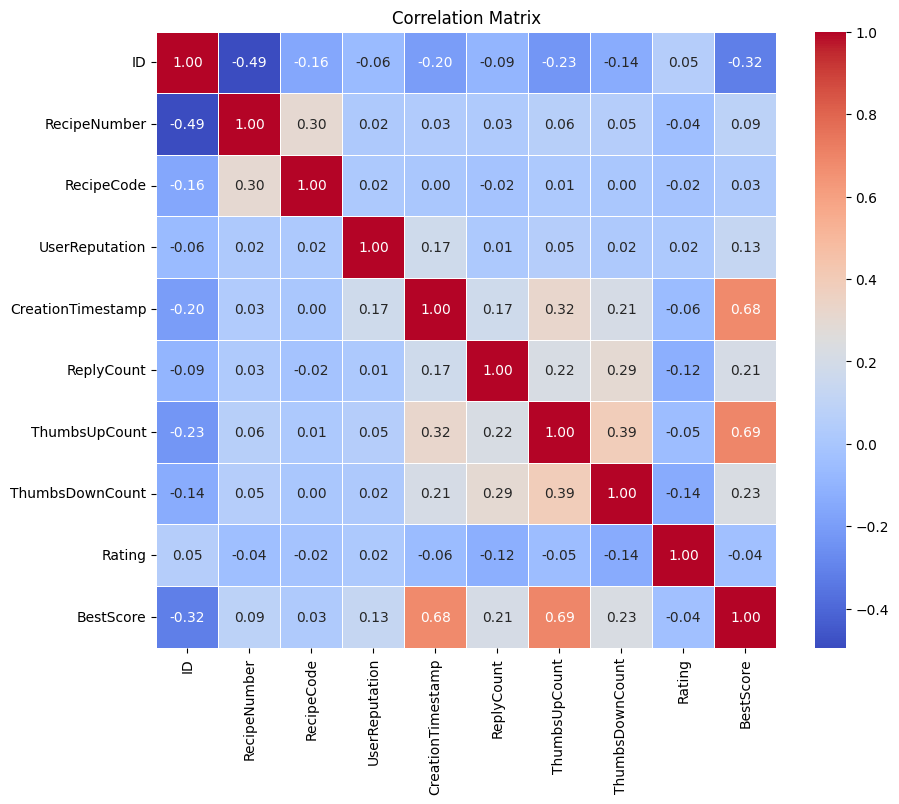

In [12]:

numerical_columns = ['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation',
       'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'Rating', 'BestScore']

numerical_df = train[numerical_columns]

correlation_matrix = numerical_df.corr()

# The Below code is for plotting the Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

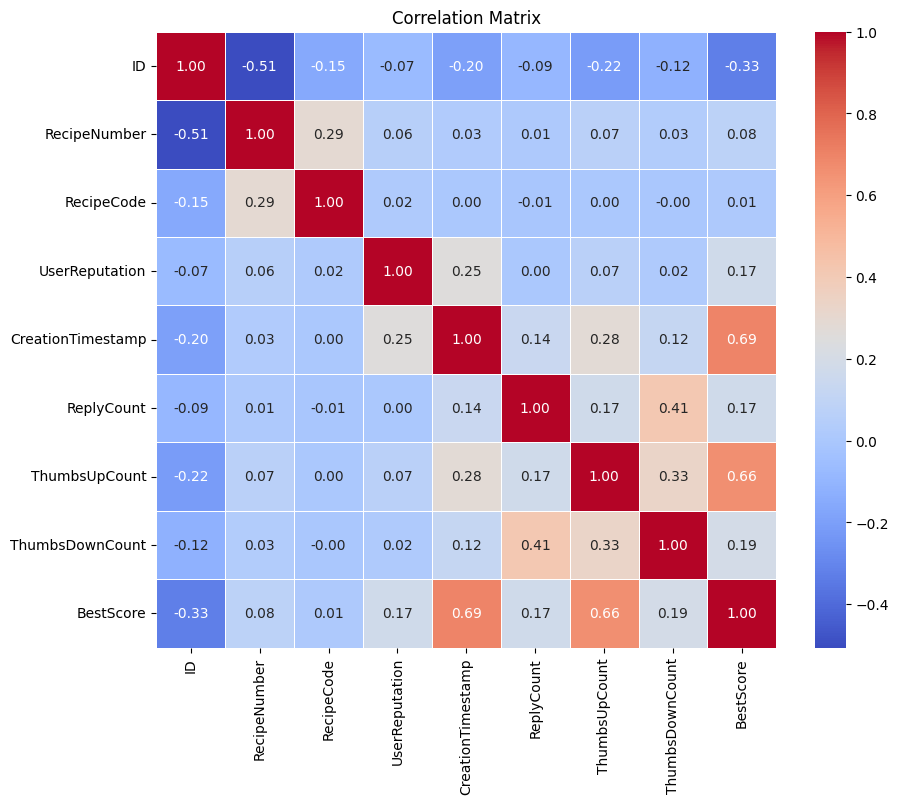

In [13]:
numerical_columns = ['ID','RecipeNumber','RecipeCode','UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
numerical_df = test[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

* The criteria for determining the strength of a correlation and what constitutes the "best" correlation typically involve the magnitude (or absolute value) of the correlation coefficient, often denoted as "r".

The correlation coefficient can range from -1 to 1:

* If r is close to 1 or -1, it indicates a strong positive or negative correlation respectively. This means that as one variable increases, the other variable tends to increase (positive correlation) or decrease (negative correlation) in a consistent manner.

* If r is close to 0, it suggests a weak or no correlation between the variables. In other words, changes in one variable are not associated with predictable changes in the other variable.

##### So, the "best" correlation usually refers to a correlation coefficient that is either close to 1 or -1, indicating a strong relationship between the variables being studied. However, the interpretation of correlation should always consider the context of the data and the specific research question or hypothesis being investigated. Additionally, it's essential to remember that correlation does not imply causation.

### Droping Recipe Review Column

In [14]:
train.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [15]:
null = train['Recipe_Review'].isnull()
train = train[~null]
train.reset_index(drop=True, inplace=True)

#### We have a column named Recpie Review whivh can help us to predict Rating ,to extract the insights from that Textual Data we can use Tfid and Count Vectoriser.

*TfidfVectorizer is a class in the scikit-learn library in Python, used for converting a collection of raw documents into a matrix of TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic used to reflect the importance of a word in a document relative to a collection of documents.

*

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# fit_transform
X_train = vectorizer.fit_transform(train['Recipe_Review'])

# Transform test data
X_test = vectorizer.transform(test['Recipe_Review'])

# Convert sparse matrices to dense arrays and then to DataFrame columns
train_tfidf = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
test_tfidf = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

# Assign the transformed data back to the DataFrame
train = pd.concat([train, train_tfidf], axis=1)
test = pd.concat([test, test_tfidf], axis=1)

# Drop the original text column if needed
train.drop(columns=['Recipe_Review'], inplace=True)
test.drop(columns=['Recipe_Review'], inplace=True)

* Plotting the Bar of the Rating Distribution will enable us to Know Which Rating is most common .


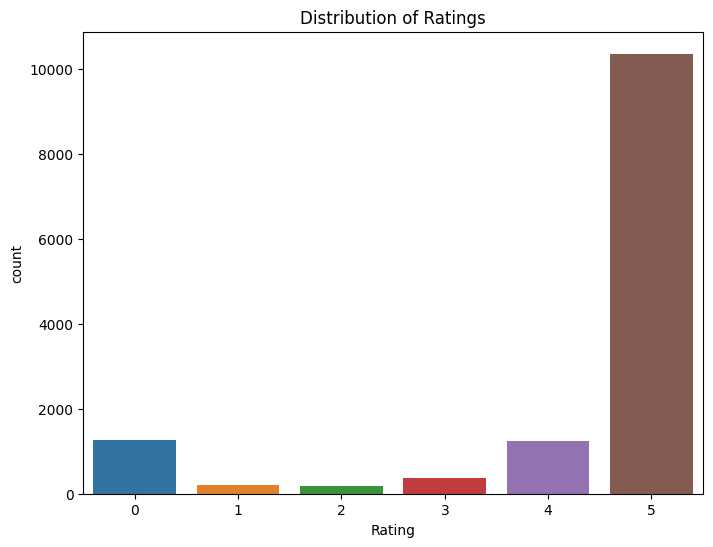

In [17]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=train)
plt.title('Distribution of Ratings')
plt.show()



<Axes: xlabel='Rating'>

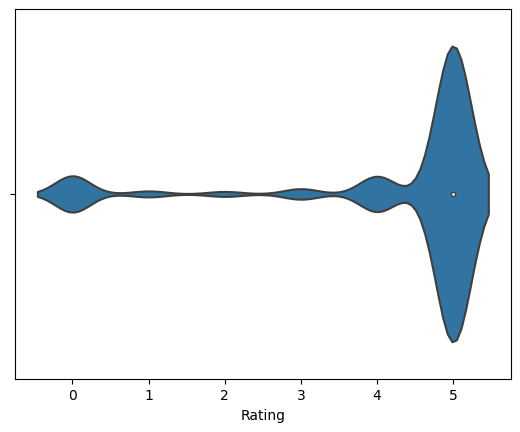

In [18]:
sns.violinplot(x='Rating', data=train)

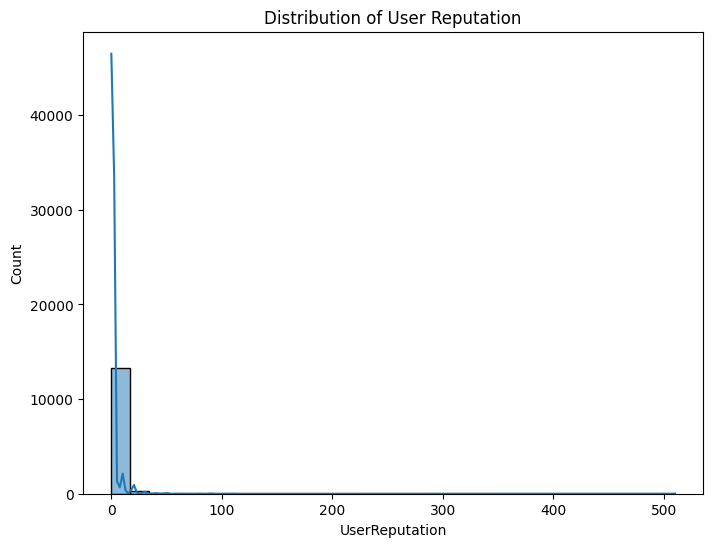

In [19]:

plt.figure(figsize=(8, 6))
sns.histplot(train['UserReputation'], bins=30, kde=True)
plt.title('Distribution of User Reputation')
plt.show()


In [20]:
def grp(df):
    # Define groups based on similarity or type of dish
    groups = {
        'Chicken Dish': ['Baked Mushroom Chicken', 'Asian Chicken Thighs', 'Grilled Huli Huli Chicken', 'Flavorful Chicken Fajitas', 'Garlic Beef Enchiladas', 'Lime Chicken Tacos', 'Smothered Chicken Breasts', 'Bruschetta Chicken', 'Chicken Penne Casserole', 'Skillet Shepherd’s Pie', 'Teriyaki Chicken Thighs', 'Comforting Chicken Noodle Soup'],
        'Soup': ['Creamy White Chili', 'Stuffed Pepper Soup', 'Cauliflower Soup', 'Cheesy Ham Chowder', 'Slow-Cooker Lasagna', 'Creamy Macaroni and Cheese', 'Creamy Coleslaw', 'Rustic Italian Tortellini Soup', 'Quick Cream of Mushroom Soup', 'Chicken Wild Rice Soup'],
        'Dessert': ['Mom’s Meat Loaf', 'Banana Bars with Cream Cheese Frosting', 'Best Ever Banana Bread', 'Hot Milk Cake', 'Peanut Butter Chocolate Dessert', 'Chunky Apple Cake', 'Chocolate Caramel Candy', 'Pineapple Pudding Cake', 'First-Place Coconut Macaroons', 'Pumpkin Bars', 'Gluten-Free Banana Bread', 'Moist Chocolate Cake', 'Chocolate Chip Oatmeal Cookies', 'Frosted Banana Bars', 'Blueberry French Toast', 'Egg Roll Noodle Bowl', 'Apple Pie', 'Basic Banana Muffins', 'Rhubarb Custard Bars', 'Pumpkin Spice Cupcakes with Cream Cheese Frosting', 'Big Soft Ginger Cookies', 'Caramel-Pecan Cheesecake Pie', 'Caramel Heavenlies', 'Lemon Blueberry Bread', 'Easy Peanut Butter Fudge', 'Favorite Dutch Apple Pie', 'Peanut Butter Cup Cheesecake', 'Tennessee Peach Pudding', 'Chocolate-Strawberry Celebration Cake', 'Mamaw Emily’s Strawberry Cake', 'Sandy’s Chocolate Cake', 'Special Banana Nut Bread', 'Homemade Peanut Butter Cups'],
        'Casserole': ['Enchilada Casser-Ole!', 'Zucchini Pizza Casserole', 'Baked Spaghetti', 'Seafood Lasagna', 'Simple Au Gratin Potatoes', 'Amish Breakfast Casserole', 'Egg Roll Noodle Bowl', 'Twice-Baked Potato Casserole', 'Ravioli Lasagna', 'Macaroni Coleslaw', 'Bacon Macaroni Salad'],
        'Pie': ['Apple Pie', 'Favorite Dutch Apple Pie'],
        'Cake': ['Pumpkin Spice Cupcakes with Cream Cheese Frosting', 'Chocolate Guinness Cake', 'Pineapple Orange Cake', 'Fluffy Key Lime Pie', 'Peanut Butter Cup Cheesecake', 'Caramel-Pecan Cheesecake Pie', 'Caramel Heavenlies', 'Chocolate-Strawberry Celebration Cake', 'Mamaw Emily’s Strawberry Cake', 'Sandy’s Chocolate Cake'],
        'Bread': ['Best Ever Banana Bread', 'Hot Milk Cake', 'Basic Homemade Bread', 'Basic Banana Muffins', 'Pumpkin Bread'],
        'Salad': ['Creamy Grape Salad', 'Strawberry Pretzel Salad'],
        'Chili': ['Creamy White Chili', 'Black Bean ‘n’ Pumpkin Chili'],
        'Pudding': ['Pineapple Pudding Cake', 'Tennessee Peach Pudding'],
        'Lasagna': ['Slow-Cooker Lasagna', 'Ravioli Lasagna'],
        'Pancakes': ['Fluffy Pancakes', 'Brown Sugar Oatmeal Pancakes']
    }
    

# Map original recipe names to groups
    def map_to_group(recipe_name):
        for group, recipes in groups.items():
            if recipe_name in recipes:
                return group
        return 'Other'  # If recipe doesn't match any group, categorize as 'Other'

# Apply grouping to the RecipeName column
    df['RecipeName_Group'] = df['RecipeName'].apply(map_to_group)
    return (df)


In [21]:
from sklearn.model_selection import train_test_split

x=train.drop(columns='Rating', axis=1) # feature
y=train['Rating'] # target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[["ThumbsUpCount", "ThumbsDownCount", "ReplyCount", "UserReputation"]] = (
    scaler.fit_transform(
    x_train[["ThumbsUpCount", "ThumbsDownCount", "ReplyCount", "UserReputation"]]
    )
)

## Dropping Irrelivent Columns

In [23]:
x_train.drop(columns=['RecipeName','CommentID','UserID','UserName'], axis=1, inplace=True)
x_test.drop(columns=['RecipeName','CommentID','UserID','UserName'], axis=1, inplace=True)
train.drop(columns=['RecipeName','CommentID','UserID','UserName'], axis=1, inplace=True)
test.drop(columns=['RecipeName','CommentID','UserID','UserName'], axis=1, inplace=True)

In [24]:
train.head()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,...,year,years,yeast,yellow,yes,yesterday,yogurt,yum,yummy,zucchini
0,70,71,12259,20,1622717078,0,0,0,5,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.291831,0.000000,0.0,0.0
1,72,88,8202,1,1622717852,0,0,1,5,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,458,3,2832,1,1622717357,0,0,0,3,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,7,50,100276,1,1622648899,0,0,0,5,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,60,12,19731,1,1622718260,0,0,0,4,100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.253765,0.0,0.0


In [25]:
train.shape

(13634, 1010)

In [26]:
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Assuming your data is stored in a DataFrame called 'df'

# # Define numerical and categorical features
# numerical_features = ['UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'Rating', 'BestScore']
# #categorical_features = ['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review']

# # Pipeline for numerical features: imputation and standardization
# numerical_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),  # You can change the strategy to 'median' or 'most_frequent' based on your preference
#     ('scaler', StandardScaler())
# ])

# # Pipeline for categorical features: encoding
# categorical_pipeline = Pipeline([
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine numerical and categorical pipelines
# preprocessor = ColumnTransformer([
#     ('num', numerical_pipeline, numerical_features),
#     ('cat', categorical_pipeline, categorical_features)
# ])

# # Apply preprocessing to the data
# processed_data = preprocessor.fit_transform(train)



# # If you want to get the feature names after one-hot encoding, you can do:
# encoded_feature_names = list(preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(input_features=categorical_features))

# # Convert the processed data back to a DataFrame (optional)
# processed_df = pd.DataFrame(processed_data, columns=numerical_features + encoded_feature_names)


## Hyperparameter Tunning

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)
best_tree = grid_search.best_estimator_

In [28]:
best_tree

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)

In [29]:
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

# # Load your training data into a DataFrame (assuming it's in a CSV file)


# # Imputation for missing values
# imputer = SimpleImputer(strategy='most_frequent')  # You can choose a different strategy if needed
# x_train = imputer.fit_transform(x_train)

# # Convert back to DataFrame after imputation
# x_train = pd.DataFrame(x_train)

# # Encoding categorical variables (if any)
# # Here, I assume RecipeName and UserName are categorical variables
# encoder = OneHotEncoder(sparse=True, drop='first')  # Use drop='first' to avoid multicollinearity
# x_train = encoder.fit_transform(x_train)
# x_train = pd.DataFrame(x_train)
# # Now, data_encoded contains your preprocessed data ready for training


## LinearSVC
LinearSVC, short for Linear Support Vector Classifier, is a linear classification algorithm belonging to the Support Vector Machine (SVM) family.

In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Encode categorical labels if present
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Linear SVC model
svc_model = LinearSVC()

# Train the model
svc_model.fit(x_train, y_train_encoded)

# Make predictions on the test data
y_pred = svc_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7554088742207554


In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Initialize the Linear SVC model
svc_model = LinearSVC()

# Train the model
svc_model.fit(x_train,y_train)

# Make predictions on the test data
y_pred = svc_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7554088742207554


## DecisionTreeClassifier

DecisionTreeClassifier is a supervised learning algorithm used for classification tasks. It builds a decision tree model that predicts the target class by learning simple decision rules inferred from the features.

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier model (along with Hyper Parameter Tunning)
tree = DecisionTreeClassifier(min_samples_leaf=1,max_depth=1,random_state=42)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.7554088742207554

## LogisticRegression

Logistic Regression is a supervised learning algorithm used for binary classification tasks. Despite its name, it is used for classification rather than regression. 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7554088742207554
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        80
           4       0.00      0.00      0.00       243
           5       0.76      1.00      0.86      2060

    accuracy                           0.76      2727
   macro avg       0.13      0.17      0.14      2727
weighted avg       0.57      0.76      0.65      2727



## XGBClassifier

#### XGBoost (Extreme Gradient Boosting) Classifier is a powerful ensemble learning algorithm that is based on the gradient boosting framework. It's highly efficient, flexible, and widely used in machine learning competitions and real-world applications due to its excellent predictive performance.

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

model = XGBClassifier(n_estimators=100, max_depth=18, learning_rate=0.1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7766776677667767
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.13      0.23       257
           1       0.31      0.29      0.30        45
           2       0.20      0.02      0.04        42
           3       0.47      0.10      0.16        80
           4       0.43      0.09      0.15       243
           5       0.79      0.99      0.88      2060

    accuracy                           0.78      2727
   macro avg       0.50      0.27      0.29      2727
weighted avg       0.73      0.78      0.71      2727



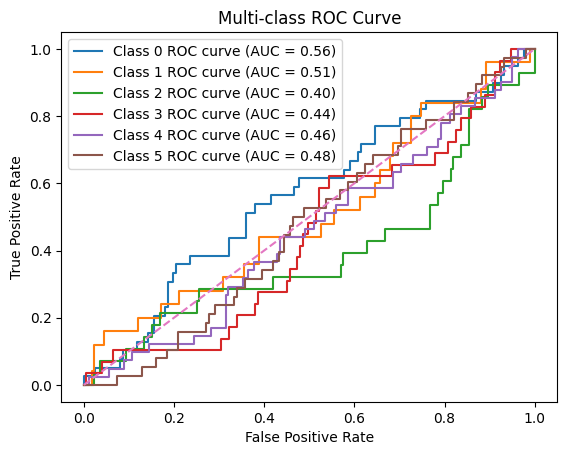

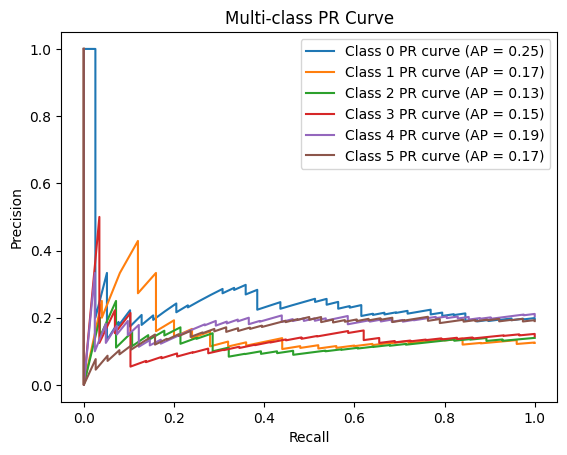

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

# Sample data
X = sample.drop(columns='Rating', axis=1) 
Y = sample['Rating']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a model (e.g., Logistic Regression)
model = LogisticRegression(random_state=42, multi_class='ovr')
model.fit(x_train, y_train)

# Get predictions and probabilities
y_probs = model.predict_proba(x_test)

# Binarize the labels for one-vs-all approach
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Number of classes
n_classes = y_test_binarized.shape[1]

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} ROC curve (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='upper left')
plt.show()

# Plot PR curve for each class
plt.figure()
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_probs[:, i])
    average_precision = average_precision_score(y_test_binarized[:, i], y_probs[:, i])
    plt.plot(recall, precision, label=f'Class {i} PR curve (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class PR Curve')
plt.legend(loc='upper right')
plt.show()


## Multi-Class ROC(Receiver Operating Characteristic)  Curve

The multi-class ROC curves with the given AUC (Area Under the Curve) values provide insights into the model's ability to discriminate between different classes. Let's interpret the given AUC values for each class:

#### AUC Values: 
The provided AUC values range from 0.40 to 0.56, which suggests the model's performance in terms of discriminating between the classes.

### Model Performance:

* #### Class 0: 
The highest AUC of 0.56 indicates that the model performs slightly better in distinguishing Class 0 from the other classes compared to the other classes.
* #### Class 1:
An AUC of 0.51 is close to the chance performance (0.5), suggesting the model has limited ability to distinguish Class 1 from other classes.
* #### Classes 2-5:
AUC values ranging from 0.40 to 0.48 indicate relatively poor performance in discriminating these classes from the other classes. An AUC value below 0.5 suggests the model may be performing worse than chance for some classes.

### Model Improvements:

* #### Low Discrimination: 
The overall performance of the model in discriminating between the classes is generally low, particularly for classes with AUC values below 0.5. This indicates that the model may struggle to classify these classes effectively.
* #### Revisit the Model: 
Given the low AUC values, you may want to revisit the model choice or the features used. Adjusting the model's hyperparameters, using more advanced models, or adding more discriminative features may help improve performance.
* #### Imbalanced Classes: 
Consider checking if the dataset has imbalanced classes. Class imbalance can affect the model's performance, particularly in terms of ROC and PR curves.

### Threshold Selection:

Impact of Threshold: The low AUC values suggest that the model's performance is sensitive to the choice of decision threshold. Fine-tuning the threshold for each class may improve the model's overall performance.

## Multi-Class PR Curve

The multi-class Precision-Recall (PR) curves and their associated Average Precision (AP) values provide insights into the model's performance in terms of precision and recall for each class. Let's interpret the given AP values for each class:

## AP Values:
The provided AP values range from 0.13 to 0.25, which indicates the model's overall performance in terms of precision and recall for each class.

## Model Performance:

* ### Class 0:
The highest AP value of 0.25 for Class 0 suggests that the model performs better in terms of balancing precision and recall for this class compared to the other classes.
* ### Other Classes:
The AP values for the other classes (ranging from 0.13 to 0.19) indicate relatively poor performance in terms of precision and recall. These values suggest that the model struggles to achieve a good balance between precision and recall for these classes.

## Model Improvements:

* ### Low Performance: 
The AP values for all classes are relatively low, indicating the model has difficulty in achieving a good trade-off between precision and recall.
* ### Revisit the Model: 
Given the low AP values, you may want to revisit the model choice, fine-tune the model's hyperparameters, or explore alternative models to improve the performance for each class.
* ### Feature Engineering:
Consider improving the feature set by engineering more discriminative features or handling any class imbalance issues.

## Insights for Specific Classes:

* ### Class Discrimination:
The differences in AP values across classes suggest that the model has varying levels of difficulty in distinguishing each class from the others.
* ### Imbalanced Classes: 
If there is class imbalance in the dataset, this could negatively affect the model's precision and recall, particularly for classes with lower AP values.
* ### PR Curve Shape:
Observing the shape of the PR curve for each class can provide additional insights. A PR curve that stays high on the y-axis (precision) even as recall increases indicates a good model performance for that class. If the curve quickly drops, it suggests poor performance.

In [36]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.3]
# }

# # Initialize XGBClassifier
# model = XGBClassifier()

# # Perform GridSearchCV
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# # Get the best estimator
# best_model = grid_search.best_estimator_

# # Predictions
# y_pred = best_model.predict(x_test)

# # Evaluate
# accuracy = accuracy_score(y_test, y_pred)
# print("Best Parameters:", grid_search.best_params_)
# print("Accuracy:", accuracy)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [37]:
y_pred_test=model.predict(test)
y_pred_test

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 10
- 12
- 13
- 14
- 15
- ...


# Submission File

In [ ]:
submission = pd.DataFrame(columns = ['ID','Rating'])
submission['Rating'] = y_pred_test
submission['ID'] = [i for i in range(1,len(y_pred_test)+1)]
submission.to_csv('submission.csv',index=False)


In [ ]:
submission.shape

# Reading Submission File

In [ ]:
pd.read_csv('/kaggle/working/submission.csv')